# Install Libraries

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=d065275576e4edbd5693475f55b3ae76f57dde93e2d2f9937167f028ee646ffa
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


# Read Dataset

In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("csv_app") \
    .getOrCreate()

# Read a CSV file into a DataFrame
csv_file_path = "df1_loan.csv"
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Show the DataFrame schema
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: double (nullable = true)
 |-- LoanAmount: double (nullable = true)
 |-- Loan_Amount_Term: double (nullable = true)
 |-- Credit_History: double (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: string (nullable = true)
 |-- Total_Income: string (nullable = true)



# Show First Few Rows

In [ ]:
# Show the first few rows of the DataFrame
df.show()

+---+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|_c0| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|Total_Income|
+---+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|  0|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|           360.0|           1.0|        Urban|          Y|     $5849.0|
|  1|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|     128.0|           360.0|           1.0|        Rural|          N|     $6091.0|
|  2|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           30

# Show Top 10 Value from CoapplicantIncome column Order from Highest

In [ ]:
# Show the top 10 values from the CoapplicantIncome column
from pyspark.sql.functions import col
df.orderBy(col("CoapplicantIncome").desc()).show(10)

+---+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|_c0| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|Total_Income|
+---+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|402|LP002297|  Male|     No|         0| Graduate|           No|           2500|          20000.0|     103.0|           360.0|           1.0|    Semiurban|          Y|    $22500.0|
|417|LP002342|  Male|    Yes|         2| Graduate|          Yes|           1600|          20000.0|     239.0|           360.0|           1.0|        Urban|          N|    $21600.0|
|177|LP001610|  Male|    Yes|        3+| Graduate|           No|           5516|          11300

# Remove Unused Column

In [ ]:
# Drop the unused columns
columns_to_drop = ["_c0", "Loan_ID"]
df = df.drop(*columns_to_drop)
df.show(10)

+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|Total_Income|
+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|           360.0|           1.0|        Urban|          Y|     $5849.0|
|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|     128.0|           360.0|           1.0|        Rural|          N|     $6091.0|
|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|      66.0|           360.0|           1.0|        Urban|

# Remove String and Change Datatype to Float

In [ ]:
from pyspark.sql.functions import col, regexp_replace
# Remove the dollar sign ('$') from the Total_Income column
df = df.withColumn("Total_Income", regexp_replace(col("Total_Income"), "[$]", ""))

# Change the datatype of Total_Income column to float
df = df.withColumn("Total_Income", df["Total_Income"].cast("float"))
df.show(10)

+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|Total_Income|
+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+------------+
|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      NULL|           360.0|           1.0|        Urban|          Y|      5849.0|
|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|     128.0|           360.0|           1.0|        Rural|          N|      6091.0|
|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|      66.0|           360.0|           1.0|        Urban|

# Make Histplot Visualization

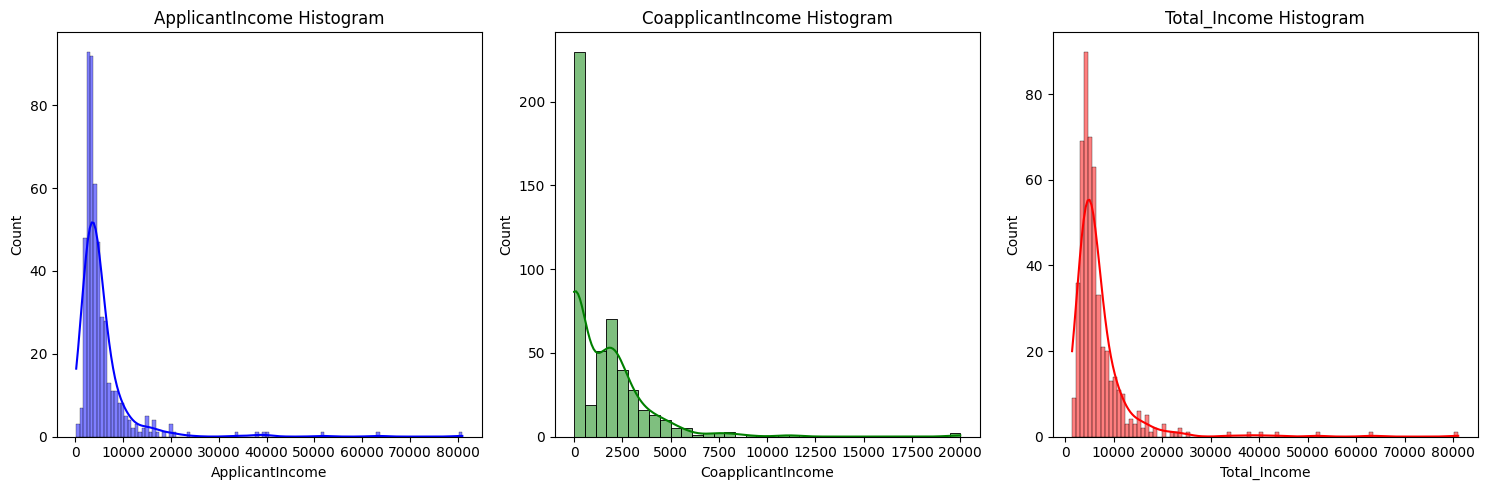

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert DataFrame to Pandas DataFrame for visualization
df_pd = df.select("ApplicantIncome", "CoapplicantIncome", "Total_Income").toPandas()

# Plot histogram for each column
plt.figure(figsize=(15, 5))

# Histogram for ApplicantIncome
plt.subplot(1, 3, 1)
sns.histplot(df_pd["ApplicantIncome"], kde=True, color='blue')
plt.title("ApplicantIncome Histogram")

# Histogram for CoapplicantIncome
plt.subplot(1, 3, 2)
sns.histplot(df_pd["CoapplicantIncome"], kde=True, color='green')
plt.title("CoapplicantIncome Histogram")

# Histogram for Total_Income
plt.subplot(1, 3, 3)
sns.histplot(df_pd["Total_Income"], kde=True, color='red')
plt.title("Total_Income Histogram")

plt.tight_layout()
plt.show()

# Visualize Countplot

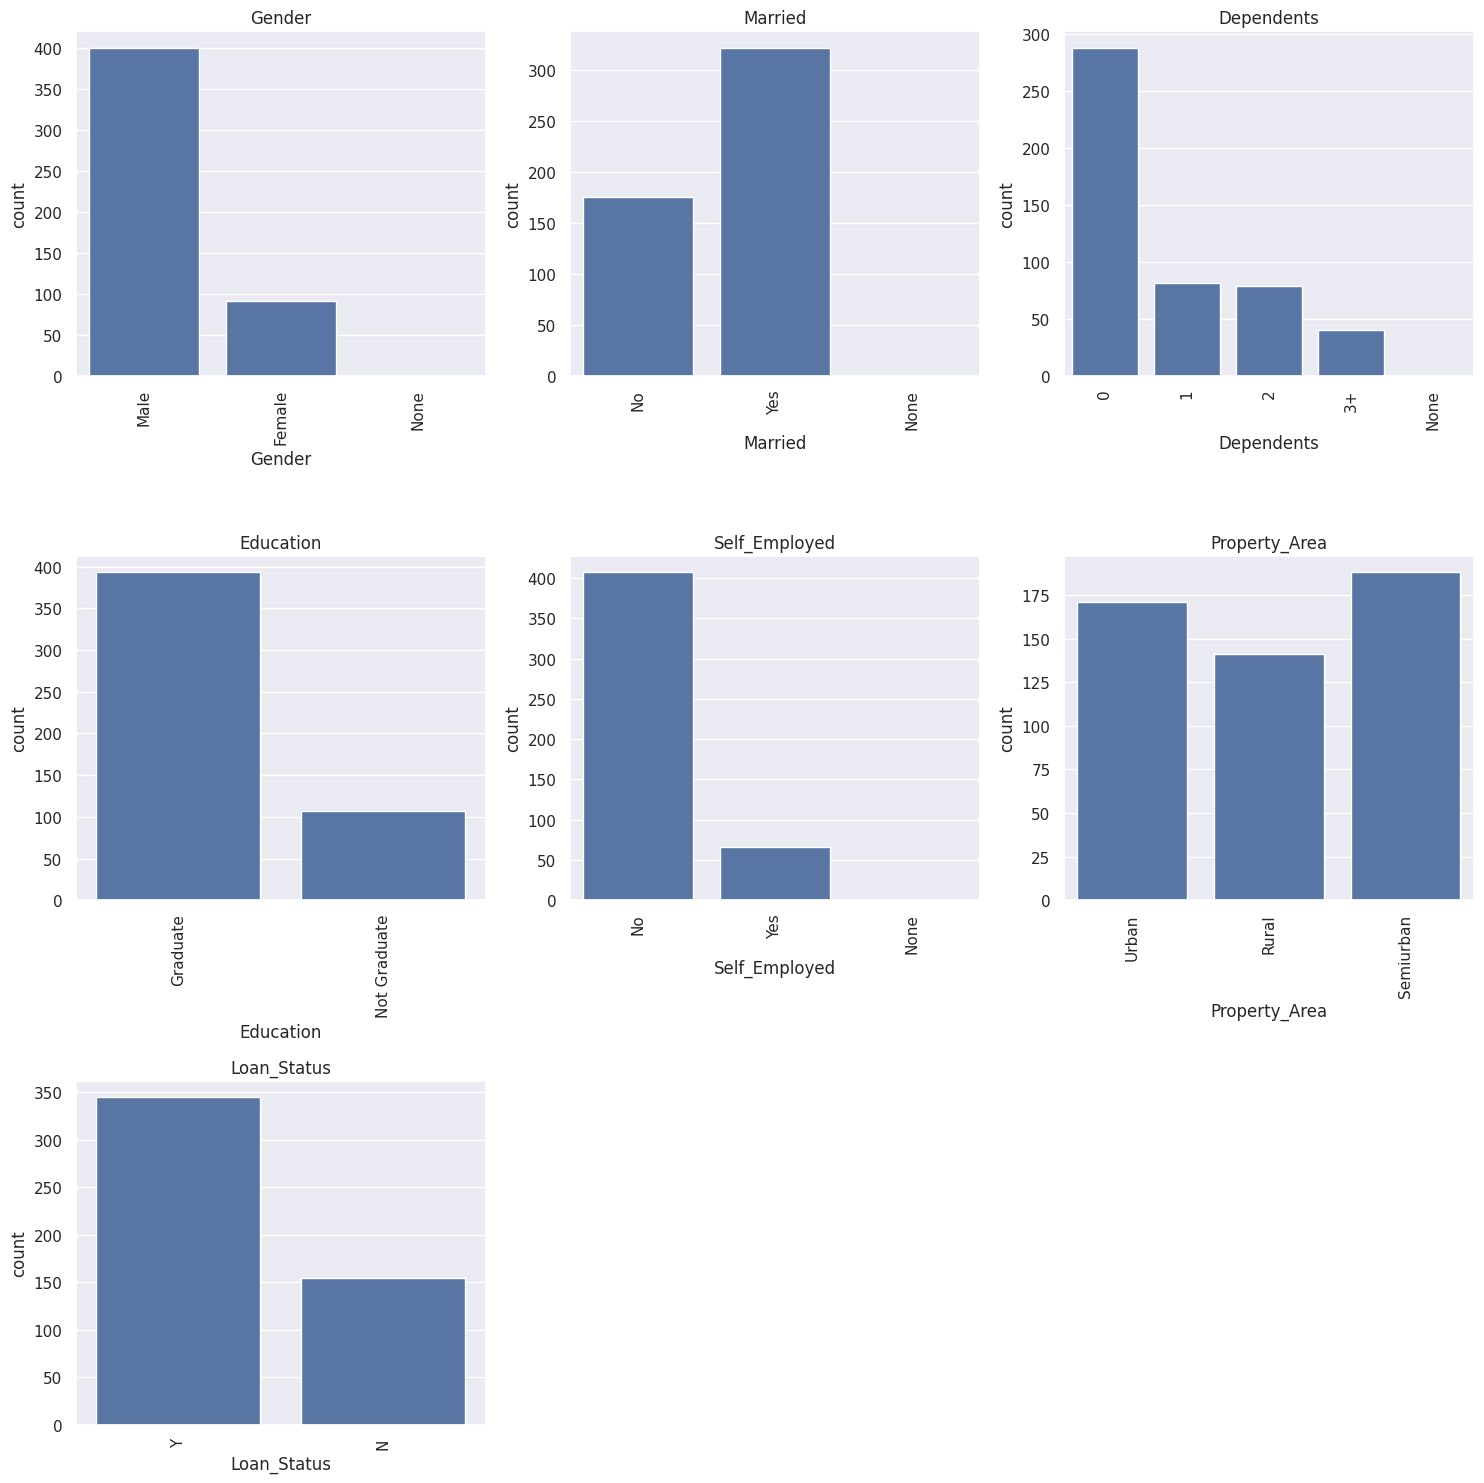

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)
# Convert DataFrame to Pandas DataFrame for visualization
df_pd = df.toPandas()

# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df_pd.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    unique_values = df_pd[var].unique()
    sns.countplot(x=var, data=df_pd, ax=axs[i], order=unique_values)
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()